In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie_df = pd.read_csv("IMDb_Movies_India.csv", encoding='ISO-8859-1')

In [3]:
movie_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [5]:
print(movie_df.isnull().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


#### Data Preprocessing

In [27]:
# Convert 'Year' to integer type
most_common_year = movie_df['Year'].mode()[0]
movie_df['Year'] = movie_df['Year'].fillna(most_common_year).astype(int)


In [25]:
most_common_year

0

In [7]:
# Convert 'Duration' to numeric (assuming it's in minutes)
movie_df['Duration'] = pd.to_numeric(movie_df['Duration'].str.replace(' min', ''), errors='coerce')

In [8]:
# Convert 'Votes' to numeric
movie_df['Votes'] = pd.to_numeric(movie_df['Votes'].str.replace(',', ''), errors='coerce')

In [9]:
# Handle missing values
# Fill the blanks in Genre with 'Unknown'
movie_df['Genre'] = movie_df['Genre'].fillna('Unknown')
# Impute the missing Ratings with the mean
movie_df['Rating'] = movie_df['Rating'].fillna(movie_df['Rating'].mean())

In [10]:
# Create a combined 'Actors' column
movie_df['Actors'] = movie_df['Actor 1'] + ',' + movie_df['Actor 2'] + ',' + movie_df['Actor 3']
movie_df['Actors'] = movie_df['Actors'].fillna('').apply(lambda x: ','.join(set(x.split(',')) - {''}))

In [11]:
# Remove the negative symbol from Year
movie_df['Year'] = movie_df['Year'].abs()

In [29]:
# Drop rows where the year is before 2000
movie_df = movie_df[movie_df['Year'] >= 2000]

In [44]:
# Standardize genre labels (convert to lowercase and strip whitespace)
# Function to clean genre labels
def clean_genre(genre):
    # Convert to lowercase, strip whitespace, and remove non-printable characters
    return ''.join(filter(str.isprintable, genre.lower().strip()))

# Apply the cleaning function to the Genre column
movie_df['Genre'] = movie_df['Genre'].apply(clean_genre)

C:\Users\admin\AppData\Local\Temp\ipykernel_13068\1713098033.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['Genre'] = movie_df['Genre'].apply(clean_genre)


In [39]:
movie_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109.0,drama,7.000000,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Arvind Jangid,Vivek Ghamande,Rasika Dugal"
2,#Homecoming,2021,90.0,"drama, musical",5.841621,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,"Plabita Borthakur,Roy Angana,Sayani Gupta"
3,#Yaaram,2019,110.0,"comedy, romance",4.400000,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Ishita Raj,Prateik,Siddhant Kapoor"
4,...And Once Again,2010,105.0,drama,5.841621,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,"Rituparna Sengupta,Rajat Kapoor,Antara Mali"
6,...Yahaan,2005,142.0,"drama, romance, war",7.400000,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill,Yashpal Sharma,Minissha Lamba"


In [40]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6007 entries, 1 to 15506
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6007 non-null   object 
 1   Year      6007 non-null   int32  
 2   Duration  3979 non-null   float64
 3   Genre     6007 non-null   object 
 4   Rating    6007 non-null   float64
 5   Votes     3673 non-null   float64
 6   Director  5818 non-null   object 
 7   Actor 1   5437 non-null   object 
 8   Actor 2   5186 non-null   object 
 9   Actor 3   4908 non-null   object 
 10  Actors    6007 non-null   object 
dtypes: float64(3), int32(1), object(7)
memory usage: 668.7+ KB


#### Exploratory Data Analysis

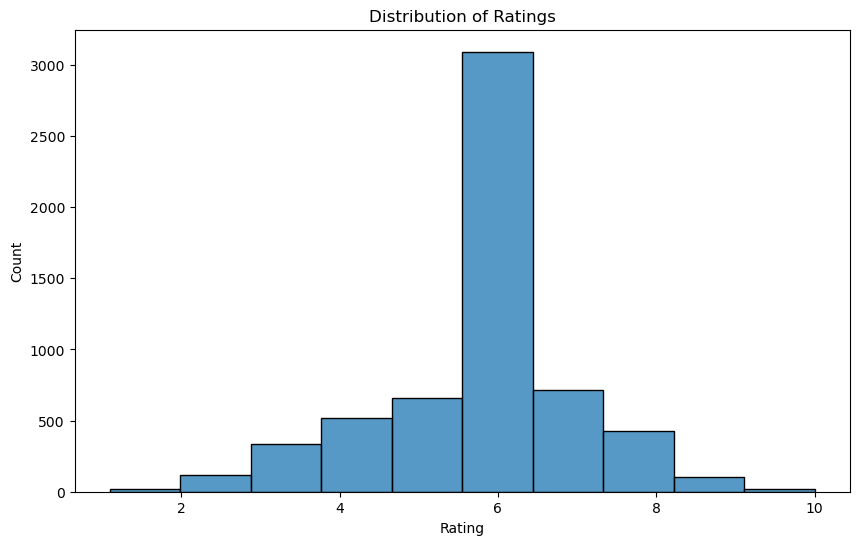

In [41]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(movie_df['Rating'], bins=10)
plt.title('Distribution of Ratings')
plt.show()

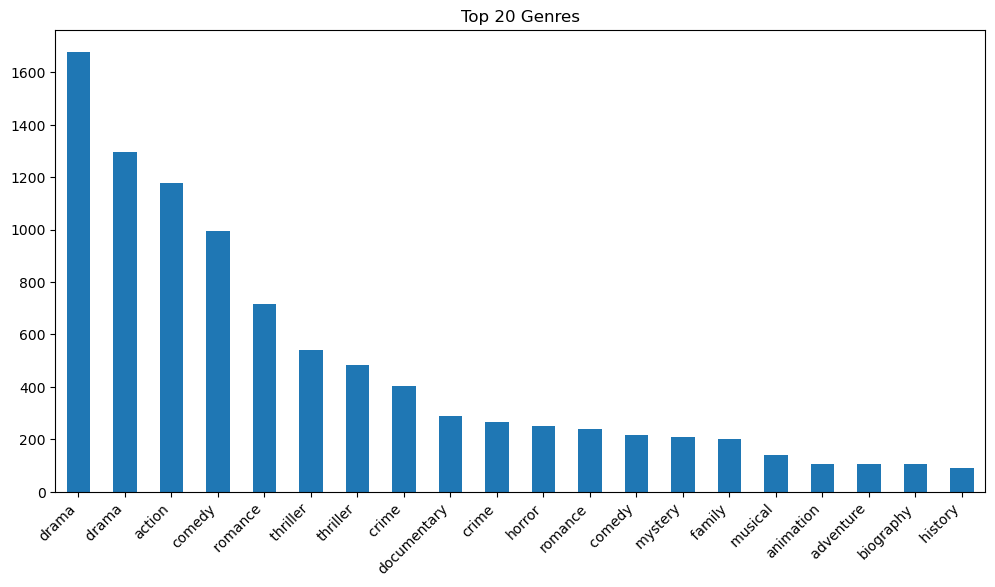

In [51]:
# Top genres
genre_counts = movie_df['Genre'].str.split(',', expand=True).stack().value_counts()
plt.figure(figsize=(12, 6))
genre_counts[:20].plot(kind='bar')
plt.title('Top 20 Genres')
plt.xticks(rotation=45, ha='right')
plt.show()


In [46]:
movie_df['Genre']

1                            drama
2                   drama, musical
3                  comedy, romance
4                            drama
6              drama, romance, war
                   ...            
15488                        drama
15489        comedy, drama, family
15493                        drama
15494    biography, drama, history
15506                       action
Name: Genre, Length: 6007, dtype: object

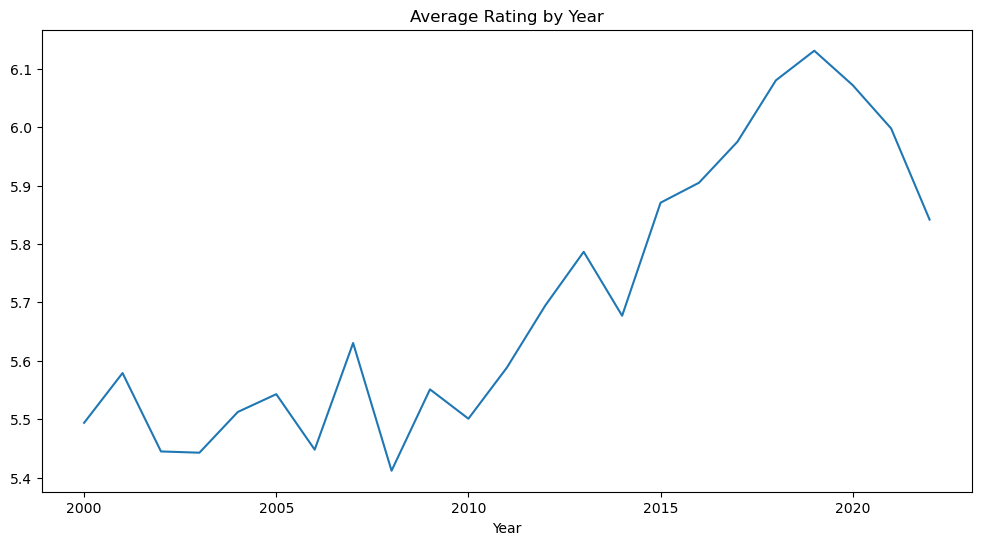

In [47]:
# Ratings over years
plt.figure(figsize=(12, 6))
movie_df.groupby('Year')['Rating'].mean().plot()
plt.title('Average Rating by Year')
plt.show()

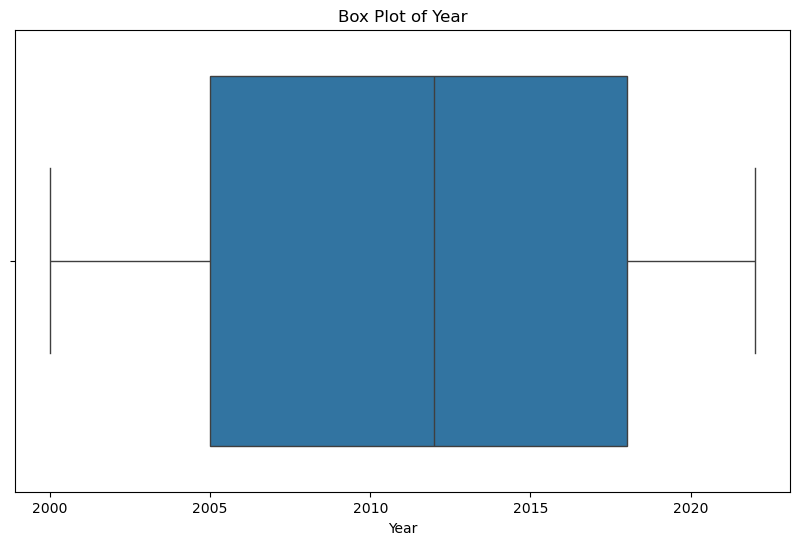

In [48]:
# Box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=movie_df['Year'])
plt.title('Box Plot of Year')
plt.show()

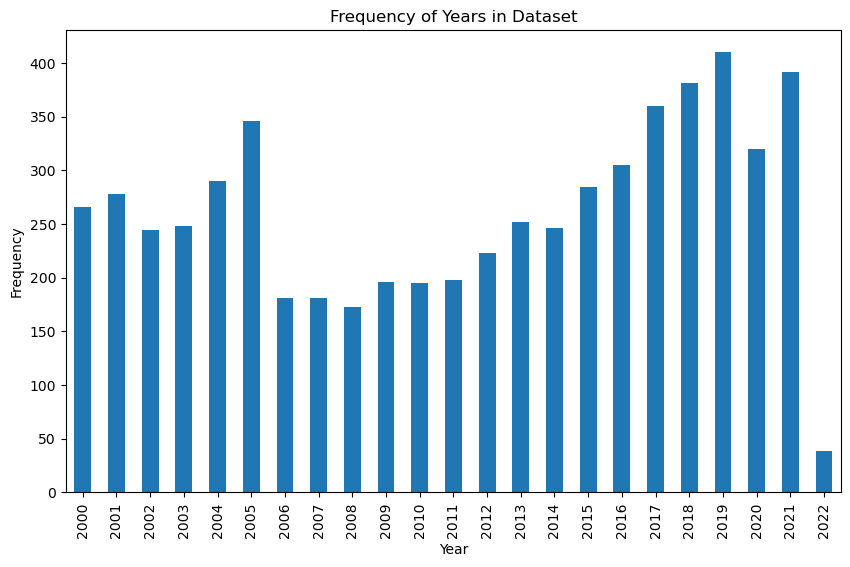

In [49]:
# Calculate the frequency of each year
year_counts = movie_df['Year'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Years in Dataset')
plt.show()

In [52]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6007 entries, 1 to 15506
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6007 non-null   object 
 1   Year      6007 non-null   int32  
 2   Duration  3979 non-null   float64
 3   Genre     6007 non-null   object 
 4   Rating    6007 non-null   float64
 5   Votes     3673 non-null   float64
 6   Director  5818 non-null   object 
 7   Actor 1   5437 non-null   object 
 8   Actor 2   5186 non-null   object 
 9   Actor 3   4908 non-null   object 
 10  Actors    6007 non-null   object 
dtypes: float64(3), int32(1), object(7)
memory usage: 668.7+ KB


#### Feature Engineering

In [ ]:
# One-hot encode genres
genres = df['Genre'].str.get_dummies(sep=',')
df = pd.concat([df, genres], axis=1)

# Create decade feature
df['Decade'] = (df['Year'] // 10) * 10

# Extract number of actors
df['Num_Actors'] = df['Actors'].str.count(',') + 1

#### Build Simple Content-Based Recommendation System

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a function to combine relevant features
def combine_features(row):
    return f"{row['Name']} {row['Genre']} {row['Director']} {row['Actors']}"

df['combined_features'] = df.apply(combine_features, axis=1)

# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get movie recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = df[df['Name'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    return df['Name'].iloc[movie_indices]

# Example recommendation
movie_title = "Inception"  # replace with a movie title from your dataset
print(f"Recommendations for {movie_title}:")
print(get_recommendations(movie_title))

#### Model Evaluation

In [ ]:
def check_relevance(title, recommendations):
    movie = df[df['Name'] == title].iloc[0]
    relevance_scores = []
    for rec in recommendations:
        rec_movie = df[df['Name'] == rec].iloc[0]
        score = 0
        if movie['Genre'] == rec_movie['Genre']:
            score += 1
        if movie['Director'] == rec_movie['Director']:
            score += 1
        if any(actor in rec_movie['Actors'] for actor in movie['Actors'].split(',')):
            score += 1
        relevance_scores.append(score)
    return sum(relevance_scores) / len(relevance_scores)

relevance = check_relevance(movie_title, get_recommendations(movie_title))
print(f"Average relevance score: {relevance}")